# Analyzing Economic Impacts of COVID-19 in Monroe County, New York

### Importing Basic Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importing Statistics Libraries for Analysis

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import pearsonr

### Importing data files

In [3]:
monroe_housing_prices = pd.read_csv("data/housing-price.csv")
monroe_unemployment_percentages = pd.read_csv("data/monroe-unemployment-percentages.csv")
monroe_unemployment_numbers = pd.read_csv("data/monroe-unemployment-numbers.csv")
monroe_case_count = pd.read_csv("data/daily-case-count-monroe.csv")
monroe_gdp = pd.read_csv("data/monroe-gdp.csv")

In [4]:
monroe_housing_prices.head()

,DATE,MEDLISPRI36055
0,2016-07-01,154900.0
1,2016-08-01,150000.0
2,2016-09-01,153900.0
3,2016-10-01,149900.0
4,2016-11-01,146425.0


In [5]:
monroe_unemployment_percentages.head()

,DATE,NYMONR5URN
0,1990-01-01,3.7
1,1990-02-01,3.7
2,1990-03-01,3.4
3,1990-04-01,3.2
4,1990-05-01,3.2


In [6]:
monroe_case_count.tail()

,Unnamed: 0,date,confirmed_cases,confirmed_rate,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
604,604,2021-09-27,79131,173.0,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN
605,605,2021-09-28,79289,204.0,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN
606,606,2021-09-29,79539,234.5,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN
607,607,2021-09-30,79758,239.0,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN
608,608,2021-10-01,80017,247.0,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN


### Exploratory Data Analysis

We perform a visual inspection of our data to see the trend at first go. We first extract the data from Feb 2020 to October 2021 to be consistent with the common analysis we performed for COVID-19 case count.

In [7]:
# Extracting housing prices from Feb 2020 to Oct 2021
monroe_housing_prices = monroe_housing_prices.iloc[43:64]

In [8]:
# Extracting unemployment percentages from Feb 2020 to Oct 2021
monroe_unemployment_percentages = monroe_unemployment_percentages.iloc[361:382]

Text(0.5, 1.0, 'Unemployment Percentage in Monroe County')

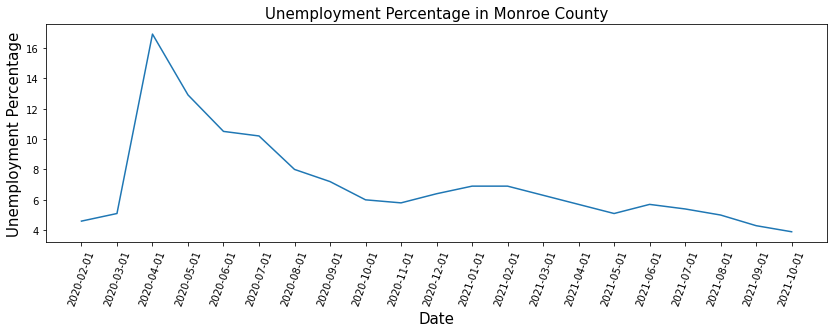

In [9]:
# Plotting unemployment percentages wrt time  
plt.figure(figsize=(14,4))
plt.xticks(rotation=70)
plt.plot(monroe_unemployment_percentages['DATE'], monroe_unemployment_percentages['NYMONR5URN'])
plt.xlabel('Date', fontdict={'fontsize': 15})
plt.ylabel('Unemployment Percentage', fontdict={'fontsize': 15})
plt.title('Unemployment Percentage in Monroe County', fontdict={'fontsize': 15})

Text(0.5, 1.0, 'Median Housing Prices in Monroe County')

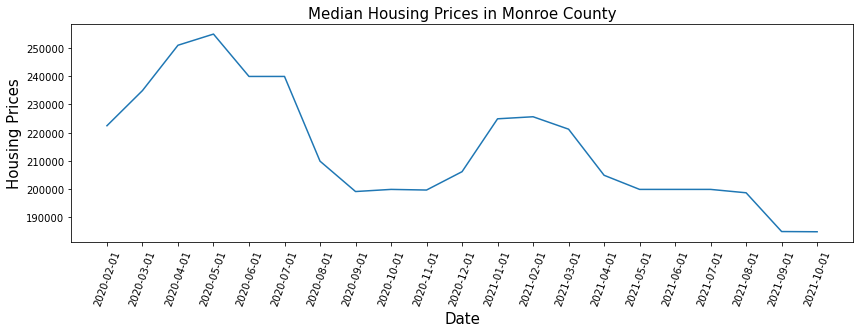

In [10]:
# Plotting median housing prices wrt time 
plt.figure(figsize=(14,4))
plt.xticks(rotation=70)
plt.plot(monroe_housing_prices['DATE'], monroe_housing_prices['MEDLISPRI36055'])
plt.xlabel('Date', fontdict={'fontsize': 15})
plt.ylabel('Housing Prices', fontdict={'fontsize': 15})
plt.title('Median Housing Prices in Monroe County', fontdict={'fontsize': 15})

Text(0.5, 1.0, 'GDP in Monroe County')

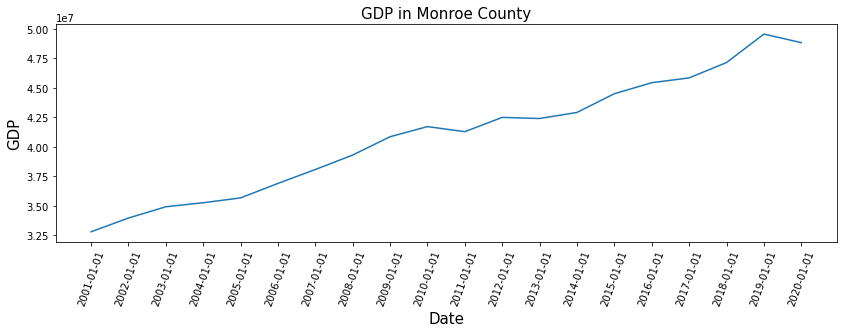

In [11]:
# Plotting GDP wrt time 
plt.figure(figsize=(14,4))
plt.xticks(rotation=70)
plt.plot(monroe_gdp['DATE'], monroe_gdp['GDPALL36055'])
plt.xlabel('Date', fontdict={'fontsize': 15})
plt.ylabel('GDP', fontdict={'fontsize': 15})
plt.title('GDP in Monroe County', fontdict={'fontsize': 15})

### Statistical Analysis

To perform statistical analysis, we first convert the case count data from daily to monthly. Then, we merge it with the unemployment dataset and the median housing prices dataset. We run Pearson Correlation test on unemployment percentages, and Granger Causality test on median housing prices. 

In [12]:
monroe_case_count = pd.read_csv("data/daily-case-count-monroe.csv", parse_dates =["date"], index_col ="date")
average= lambda x: sum(x)/len(x)
logic = {'confirmed_cases'  : average}
result=monroe_case_count.resample('M').apply(logic)
result.reset_index(inplace=True)

#Converting dates in date column to bring them to a standard format with respect to unemployment data and median housing prices data
date_pattern = []
for index, row in result.iterrows():
  row['date'] = row['date'].strftime('%Y-%m-%d')[0:7]
  date_pattern.append(row['date'])

result['date'] = date_pattern


In [13]:
monroe_housing_prices.reset_index()
date_pattern_housing = []
for index, row in monroe_housing_prices.iterrows():
  row['DATE'] = row['DATE'][0:7]
  date_pattern_housing.append(row['DATE'])

monroe_housing_prices['DATE'] = date_pattern_housing
monroe_housing_prices.reset_index(inplace = True)
monroe_housing_prices.drop('index', axis=1, inplace = True)

monroe_housing_prices = monroe_housing_prices.rename(columns={'DATE': 'date'})

In [14]:
monroe_unemployment_percentages.head()

,DATE,NYMONR5URN
361,2020-02-01,4.6
362,2020-03-01,5.1
363,2020-04-01,16.9
364,2020-05-01,12.9
365,2020-06-01,10.5


In [15]:
date_pattern_unemployment = []
for index, row in monroe_unemployment_percentages.iterrows():
  row['DATE'] = row['DATE'][0:7]
  date_pattern_unemployment.append(row['DATE'])

monroe_unemployment_percentages['DATE'] = date_pattern_unemployment
monroe_unemployment_percentages.reset_index(inplace = True)
monroe_unemployment_percentages.drop('index', axis=1, inplace = True)

monroe_unemployment_percentages = monroe_unemployment_percentages.rename(columns={'DATE': 'date'})

In [16]:
# Merging case count and housing prices dataset
df_merge = pd.merge(monroe_housing_prices, result, on="date", how='inner')

In [17]:
# Merging case count and unemployment percentages dataset
df_merge_unemp_rate = pd.merge(monroe_unemployment_percentages, result, on="date", how='inner')

In [18]:
df_merge.head()

,date,MEDLISPRI36055,confirmed_cases
0,2020-02,222450.0,0.000000
1,2020-03,234900.0,57.225806
2,2020-04,250950.0,911.933333
3,2020-05,254900.0,2199.451613
4,2020-06,239900.0,3378.133333


### Checking stationarity of time series

Before performing Granger causality test, we need to check if the time series are stationary. 
We use augmented dickey fuller test for this analysis.

In [19]:
result=adfuller (df_merge['confirmed_cases'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -0.345247
p-value: 0.918847
Critical values:
	1%: -3.924
	5%: -3.068
	10%: -2.674


As the test statistic is greater (less negative) then the critical value, it becomes the reason to not reject the null hypothesis. This indicates that the data is non-stationary. We apply second order differencing and apply ADF again.

In [20]:
df_log_hp=np.sqrt(df_merge['confirmed_cases'])
df_diff_hp=df_log_hp.diff().dropna()
df_diff_hp_2 = df_diff_hp.diff().dropna()
#Checking the stationarity
result=adfuller (df_diff_hp_2)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -4.576645
p-value: 0.000143
Critical values:
	1%: -3.889
	5%: -3.054
	10%: -2.667


As the test statistic is smaller then the critical value 0.05, it becomes the reason to reject the null hypothesis. This indicates that the data is stationary. 

In [21]:
df_merge['confirmed_cases'] = df_diff_hp_2

Applying the same process for the median housing prices

In [22]:
result=adfuller (df_merge['MEDLISPRI36055'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -1.707831
p-value: 0.427083
Critical values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


In [24]:
df_log_hp=np.sqrt(df_merge['MEDLISPRI36055'])
df_diff_hp=df_log_hp.diff().dropna()
df_diff_hp_2 = df_diff_hp.diff().dropna()
#Checking the stationarity
result=adfuller (df_diff_hp_2)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -5.635012
p-value: 0.000001
Critical values:
	1%: -3.859
	5%: -3.042
	10%: -2.661


In [25]:
df_merge['MEDLISPRI36055'] = df_diff_hp_2

In [26]:
df_merge.fillna(0, inplace = True)
df_merge.head()

,date,MEDLISPRI36055,confirmed_cases
0,2020-02,0.000000,0.000000
1,2020-03,0.000000,0.000000
2,2020-04,3.265488,15.068686
3,2020-05,-12.357143,-5.933382
4,2020-06,-19.007470,-5.476677


In [27]:
grangercausalitytests(df_merge[['MEDLISPRI36055', 'confirmed_cases']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7509  , p=0.0696  , df_denom=17, df_num=1
ssr based chi2 test:   chi2=4.4129  , p=0.0357  , df=1
likelihood ratio test: chi2=3.9876  , p=0.0458  , df=1
parameter F test:         F=3.7509  , p=0.0696  , df_denom=17, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6505  , p=0.2272  , df_denom=14, df_num=2
ssr based chi2 test:   chi2=4.4799  , p=0.1065  , df=2
likelihood ratio test: chi2=4.0224  , p=0.1338  , df=2
parameter F test:         F=1.6505  , p=0.2272  , df_denom=14, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9189  , p=0.4635  , df_denom=11, df_num=3
ssr based chi2 test:   chi2=4.5111  , p=0.2113  , df=3
likelihood ratio test: chi2=4.0255  , p=0.2587  , df=3
parameter F test:         F=0.9189  , p=0.4635  , df_denom=11, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.5969  , p=0.0320  , df_d

{1: ({'ssr_ftest': (3.750933577390731, 0.06958025839729576, 17.0, 1),
   'ssr_chi2test': (4.412863032224389, 0.035668928768212496, 1),
   'lrtest': (3.9875578657975552, 0.045837454949569104, 1),
   'params_ftest': (3.750933577390736, 0.06958025839729566, 17.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.6505032063504157, 0.22719390697490935, 14.0, 2),
   'ssr_chi2test': (4.479937274379699, 0.10646184326947276, 2),
   'lrtest': (4.022439542478651, 0.13382533877351385, 2),
   'params_ftest': (1.650503206350416, 0.22719390697490935, 14.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.9189296380134837, 0.4635336157237385, 11.0, 3),
   'ssr_chi2test': (4.511109132066193, 0.2113015160367237, 3),
   'lrtest': (4.025469036025044, 0.258727035096968, 3),
   'params_ftest': (0.9189296380134832, 0.4635336157237385, 11.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

### Calculating Pearson Correlation Coefficient between unemployment percentages and COVID-19 case count

In [28]:
df_merge_unemp_rate.head()

,date,NYMONR5URN,confirmed_cases
0,2020-02,4.6,0.000000
1,2020-03,5.1,57.225806
2,2020-04,16.9,911.933333
3,2020-05,12.9,2199.451613
4,2020-06,10.5,3378.133333


In [29]:
corr, _ = pearsonr(df_merge_unemp_rate['confirmed_cases'], df_merge_unemp_rate['NYMONR5URN'])

In [30]:
corr

-0.5534266569542172

### Thus, we see that the Pearson Correlation Coefficient between COVID-19 case count and unemployment percentage is -0.553